# Tutorial for `GeoCroissant` with HDF5 Support 🥐

## Introduction

<img src="../asset/GeoCroissant.jpg" alt="GeoCroissant" width="150" style="float: right; margin-left: 50px;">

GeoCroissant extends Croissant with geospatial concepts (e.g., spatial extents, coordinate reference systems, temporal coverage), enabling rich, location-aware metadata for Earth-observation and other spatial datasets.

**HDF5 Support**: This tutorial demonstrates how GeoCroissant works with HDF5 (Hierarchical Data Format 5) files, a powerful format for storing large multi-dimensional arrays commonly used in Earth observation and remote sensing applications. HDF5 offers efficient storage, compression, and fast I/O operations for complex geospatial datasets.

In [6]:
# Install mlcroissant 
!pip install -q mlcroissant h5py

# Example: Creating Croissant Metadata for the Landslide4sense Dataset

Let's try a concrete example with the [Landslide4sense dataset](https://huggingface.co/datasets/ibm-nasa-geospatial/Landslide4sense) hosted on Hugging Face. 

This dataset uses **HDF5 format** to store multi-band satellite imagery and binary landslide masks, making it ideal for demonstrating GeoCroissant's support for HDF5 files.


In [7]:
import json
from datetime import datetime

# Create a proper GeoCroissant JSON-LD document according to the schema
geocroissant_json = {
    "@context": {
        "@language": "en",
        "@vocab": "https://schema.org/",
        "citeAs": "cr:citeAs",
        "column": "cr:column",
        "conformsTo": "dct:conformsTo",
        "cr": "http://mlcommons.org/croissant/",
        "geocr": "http://mlcommons.org/croissant/geo/",
        "rai": "http://mlcommons.org/croissant/RAI/",
        "dct": "http://purl.org/dc/terms/",
        "sc": "https://schema.org/",
        "data": {
            "@id": "cr:data",
            "@type": "@json"
        },
        "examples": {
            "@id": "cr:examples",
            "@type": "@json"
        },
        "dataBiases": "cr:dataBiases",
        "dataCollection": "cr:dataCollection",
        "dataType": {
            "@id": "cr:dataType",
            "@type": "@vocab"
        },
        "extract": "cr:extract",
        "field": "cr:field",
        "fileProperty": "cr:fileProperty",
        "fileObject": "cr:fileObject",
        "fileSet": "cr:fileSet",
        "format": "cr:format",
        "includes": "cr:includes",
        "isLiveDataset": "cr:isLiveDataset",
        "jsonPath": "cr:jsonPath",
        "key": "cr:key",
        "md5": "cr:md5",
        "parentField": "cr:parentField",
        "path": "cr:path",
        "personalSensitiveInformation": "cr:personalSensitiveInformation",
        "recordSet": "cr:recordSet",
        "references": "cr:references",
        "regex": "cr:regex",
        "repeated": "cr:repeated",
        "replace": "cr:replace",
        "samplingRate": "cr:samplingRate",
        "separator": "cr:separator",
        "source": "cr:source",
        "subField": "cr:subField",
        "transform": "cr:transform"
    },
    "@type": "sc:Dataset",
    "name": "Landslide4sense",
    "description": "The Landslide4Sense dataset contains satellite imagery for landslide detection, consisting of 3799 training, 245 validation, and 800 test image patches. Each patch is a 128x128 pixel composite of 14 bands including Sentinel-2 multispectral data (B1-B12), slope data, and digital elevation model (DEM) from ALOS PALSAR. All bands are resampled to ~10m resolution and labeled pixel-wise for landslide presence.",
    "url": "https://huggingface.co/datasets/ibm-nasa-geospatial/Landslide4sense",
    "citeAs": "@dataset{Landslide4sense, title={Landslide4Sense: Reference Benchmark Data and Deep Learning Models for Landslide Detection}, author={Ghorbanzadeh, Omid and Xu, Yongjun and Zhao, Haokun and Wang, Junxi and Zhong, Yanfei and Zhao, Dong and Zang, Qiushi and Wang, Shimin and Zhang, Fang and Shi, Yiliang and others}, year={2022}, url={https://github.com/iarai/Landslide4Sense-2022}}",
    "datePublished": "2022-01-01",
    "version": "1.0",
    "license": "Unknown",
    "conformsTo": [
        "http://mlcommons.org/croissant/1.1",
        "http://mlcommons.org/croissant/geo/1.0"
    ],
    "identifier": "ibm-nasa-geospatial/Landslide4sense",
    "alternateName": ["Landslide4Sense-2022", "L4S"],
    "creator": {
        "@type": "Organization",
        "name": "IARAI - Institute for Advanced Research in Artificial Intelligence",
        "url": "https://github.com/iarai/Landslide4Sense-2022"
    },
    "keywords": [
        "Landslide4sense",
        "landslide detection",
        "natural disasters",
        "remote sensing",
        "satellite imagery",
        "Sentinel-2",
        "ALOS PALSAR",
        "DEM",
        "slope",
        "geospatial",
        "semantic segmentation",
        "English",
        "1K - 10K",
        "Image",
        "HDF5",
        "Datasets",
        "Croissant"
    ],
    "temporalCoverage": "2015-01-01/2022-01-01",
    "geocr:coordinateReferenceSystem": "EPSG:4326",
    "spatialCoverage": {
        "@type": "Place",
        "geo": {
            "@type": "GeoShape",
            "description": "Global coverage with focus on landslide-prone regions"
        }
    },
    "geocr:spatialResolution": {
        "@type": "QuantitativeValue",
        "value": 10.0,
        "unitText": "m"
    },
    "geocr:samplingStrategy": "Subsetted to 128x128 pixel windows covering landslide and non-landslide areas from global landslide-prone regions",
    "geocr:spectralBandMetadata": [
        {
            "@type": "geocr:SpectralBand",
            "name": "B1_Coastal_Aerosol",
            "description": "Sentinel-2 Band 1 - Coastal aerosol",
            "geocr:centerWavelength": {
                "@type": "QuantitativeValue",
                "value": 443,
                "unitText": "nm"
            },
            "geocr:bandwidth": {
                "@type": "QuantitativeValue",
                "value": 20,
                "unitText": "nm"
            }
        },
        {
            "@type": "geocr:SpectralBand",
            "name": "B2_Blue",
            "description": "Sentinel-2 Band 2 - Blue",
            "geocr:centerWavelength": {
                "@type": "QuantitativeValue",
                "value": 490,
                "unitText": "nm"
            },
            "geocr:bandwidth": {
                "@type": "QuantitativeValue",
                "value": 65,
                "unitText": "nm"
            }
        },
        {
            "@type": "geocr:SpectralBand",
            "name": "B3_Green",
            "description": "Sentinel-2 Band 3 - Green",
            "geocr:centerWavelength": {
                "@type": "QuantitativeValue",
                "value": 560,
                "unitText": "nm"
            },
            "geocr:bandwidth": {
                "@type": "QuantitativeValue",
                "value": 35,
                "unitText": "nm"
            }
        },
        {
            "@type": "geocr:SpectralBand",
            "name": "B4_Red",
            "description": "Sentinel-2 Band 4 - Red",
            "geocr:centerWavelength": {
                "@type": "QuantitativeValue",
                "value": 665,
                "unitText": "nm"
            },
            "geocr:bandwidth": {
                "@type": "QuantitativeValue",
                "value": 30,
                "unitText": "nm"
            }
        },
        {
            "@type": "geocr:SpectralBand",
            "name": "B5_Red_Edge_1",
            "description": "Sentinel-2 Band 5 - Vegetation Red Edge",
            "geocr:centerWavelength": {
                "@type": "QuantitativeValue",
                "value": 705,
                "unitText": "nm"
            },
            "geocr:bandwidth": {
                "@type": "QuantitativeValue",
                "value": 15,
                "unitText": "nm"
            }
        },
        {
            "@type": "geocr:SpectralBand",
            "name": "B6_Red_Edge_2",
            "description": "Sentinel-2 Band 6 - Vegetation Red Edge",
            "geocr:centerWavelength": {
                "@type": "QuantitativeValue",
                "value": 740,
                "unitText": "nm"
            },
            "geocr:bandwidth": {
                "@type": "QuantitativeValue",
                "value": 15,
                "unitText": "nm"
            }
        },
        {
            "@type": "geocr:SpectralBand",
            "name": "B7_Red_Edge_3",
            "description": "Sentinel-2 Band 7 - Vegetation Red Edge",
            "geocr:centerWavelength": {
                "@type": "QuantitativeValue",
                "value": 783,
                "unitText": "nm"
            },
            "geocr:bandwidth": {
                "@type": "QuantitativeValue",
                "value": 20,
                "unitText": "nm"
            }
        },
        {
            "@type": "geocr:SpectralBand",
            "name": "B8_NIR",
            "description": "Sentinel-2 Band 8 - Near Infrared",
            "geocr:centerWavelength": {
                "@type": "QuantitativeValue",
                "value": 842,
                "unitText": "nm"
            },
            "geocr:bandwidth": {
                "@type": "QuantitativeValue",
                "value": 115,
                "unitText": "nm"
            }
        },
        {
            "@type": "geocr:SpectralBand",
            "name": "B9_Water_Vapour",
            "description": "Sentinel-2 Band 9 - Water vapour",
            "geocr:centerWavelength": {
                "@type": "QuantitativeValue",
                "value": 945,
                "unitText": "nm"
            },
            "geocr:bandwidth": {
                "@type": "QuantitativeValue",
                "value": 20,
                "unitText": "nm"
            }
        },
        {
            "@type": "geocr:SpectralBand",
            "name": "B10_SWIR_Cirrus",
            "description": "Sentinel-2 Band 10 - SWIR - Cirrus",
            "geocr:centerWavelength": {
                "@type": "QuantitativeValue",
                "value": 1375,
                "unitText": "nm"
            },
            "geocr:bandwidth": {
                "@type": "QuantitativeValue",
                "value": 30,
                "unitText": "nm"
            }
        },
        {
            "@type": "geocr:SpectralBand",
            "name": "B11_SWIR_1",
            "description": "Sentinel-2 Band 11 - Short Wave Infrared 1",
            "geocr:centerWavelength": {
                "@type": "QuantitativeValue",
                "value": 1610,
                "unitText": "nm"
            },
            "geocr:bandwidth": {
                "@type": "QuantitativeValue",
                "value": 90,
                "unitText": "nm"
            }
        },
        {
            "@type": "geocr:SpectralBand",
            "name": "B12_SWIR_2",
            "description": "Sentinel-2 Band 12 - Short Wave Infrared 2",
            "geocr:centerWavelength": {
                "@type": "QuantitativeValue",
                "value": 2190,
                "unitText": "nm"
            },
            "geocr:bandwidth": {
                "@type": "QuantitativeValue",
                "value": 180,
                "unitText": "nm"
            }
        },
        {
            "@type": "geocr:SpectralBand",
            "name": "B13_Slope",
            "description": "ALOS PALSAR - Slope data derived from radar",
            "dataType": "Topographic"
        },
        {
            "@type": "geocr:SpectralBand",
            "name": "B14_DEM",
            "description": "ALOS PALSAR - Digital Elevation Model",
            "dataType": "Elevation"
        }
    ],
    "distribution": [
        {
            "@type": "cr:FileObject",
            "@id": "data_repo",
            "name": "data_repo",
            "description": "Landslide4sense dataset directory containing HDF5 files",
            "contentUrl": "./Landslide4sense",
            "encodingFormat": "local_directory",
            "sha256": "placeholder_checksum_for_directory"
        },
        {
            "@type": "cr:FileSet",
            "@id": "h5-files",
            "name": "h5-files",
            "description": "All HDF5 files containing images and masks",
            "containedIn": {
                "@id": "data_repo"
            },
            "encodingFormat": "application/x-hdf5",
            "includes": "**/*.h5"
        }
    ],
    "recordSet": [
        {
            "@type": "cr:RecordSet",
            "@id": "landslide4sense",
            "name": "landslide4sense",
            "description": "Landslide4sense dataset with 14-band satellite imagery and binary mask annotations for landslide detection.",
            "field": [
                {
                    "@type": "cr:Field",
                    "@id": "landslide4sense/image",
                    "name": "landslide4sense/image",
                    "description": "File path to HDF5 image file containing 14-band satellite imagery (Sentinel-2 B1-B12, Slope, DEM). Each image is 128x128 pixels with bands stacked as (height, width, bands). Data type: float64. Dataset name within HDF5: 'img'.",
                    "dataType": "sc:Text",
                    "source": {
                        "fileSet": {
                            "@id": "h5-files"
                        },
                        "extract": {
                            "fileProperty": "fullpath"
                        },
                        "transform": {
                            "regex": "images/.*/image_.*\\.h5$"
                        }
                    },
                    "geocr:bandConfiguration": {
                        "@type": "geocr:BandConfiguration",
                        "geocr:totalBands": 14,
                        "geocr:bandNamesList": [
                            "B1_Coastal_Aerosol", 
                            "B2_Blue", 
                            "B3_Green", 
                            "B4_Red", 
                            "B5_Red_Edge_1", 
                            "B6_Red_Edge_2", 
                            "B7_Red_Edge_3", 
                            "B8_NIR", 
                            "B9_Water_Vapour", 
                            "B10_SWIR_Cirrus", 
                            "B11_SWIR_1", 
                            "B12_SWIR_2", 
                            "B13_Slope", 
                            "B14_DEM"
                        ]
                    }
                },
                {
                    "@type": "cr:Field",
                    "@id": "landslide4sense/mask",
                    "name": "landslide4sense/mask",
                    "description": "File path to HDF5 mask file containing binary landslide annotations. Each mask is 128x128 pixels with values: 0 (non-landslide) and 1 (landslide). Data type: uint8. Dataset name within HDF5: 'mask'.",
                    "dataType": "sc:Text",
                    "source": {
                        "fileSet": {
                            "@id": "h5-files"
                        },
                        "extract": {
                            "fileProperty": "fullpath"
                        },
                        "transform": {
                            "regex": "annotations/.*/mask_.*\\.h5$"
                        }
                    },
                    "geocr:bandConfiguration": {
                        "@type": "geocr:BandConfiguration",
                        "geocr:totalBands": 1,
                        "geocr:bandNamesList": ["mask"]
                    }
                },
                {
                    "@type": "cr:Field",
                    "@id": "landslide4sense/split",
                    "name": "landslide4sense/split",
                    "description": "Dataset split indicator extracted from file path (train/validation/test)",
                    "dataType": "sc:Text",
                    "source": {
                        "fileSet": {
                            "@id": "h5-files"
                        },
                        "extract": {
                            "fileProperty": "fullpath"
                        },
                        "transform": {
                            "regex": "images/(train|validation|test)/"
                        }
                    }
                }
            ]
        }
    ]
}

# Write the GeoCroissant JSON-LD to file
with open("landslide4sense_geocroissant.json", "w") as f:
    json.dump(geocroissant_json, f, indent=2)

When creating `Metadata`:
- We also check for errors in the configuration.
- We generate warnings if the configuration doesn't follow guidelines and best practices.

For instance, in this case:

In [8]:
!mlcroissant validate --jsonld=landslide4sense_geocroissant.json

I0218 09:01:08.186365 127356445840896 validate.py:53] Done.


The validation confirms our GeoCroissant metadata is correctly structured! 

Key features of this HDF5-based GeoCroissant metadata:

- **Format**: HDF5 files (application/x-hdf5)
- **Spectral Bands**: 14 bands (12 Sentinel-2 + Slope + DEM)
- **Spatial Resolution**: 10 meters per pixel
- **Image Size**: 128x128 pixels
- **Data Structure**: 
  - Images stored in HDF5 with dataset name 'img' (shape: 128, 128, 14)
  - Masks stored in HDF5 with dataset name 'mask' (shape: 128, 128)
- **Band Configuration**: Properly defined with `geocr:bandNamesList`
- **Coordinate Reference System**: EPSG:4326

# Example: Loading the Landslide4sense Dataset

Now that we have our GeoCroissant metadata, we can load the HDF5 dataset files directly.

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json

# Load the GeoCroissant metadata we created
with open("landslide4sense_geocroissant.json", "r") as f:
    metadata = json.load(f)

# Extract key information from metadata
print("Information from GeoCroissant Metadata:")
print(f"  Dataset: {metadata['name']}")
print(f"  Spatial Resolution: {metadata['geocr:spatialResolution']['value']} {metadata['geocr:spatialResolution']['unitText']}")
print(f"  Total Bands: {len(metadata['geocr:spectralBandMetadata'])}")

# Get the dataset path from metadata
dataset_path = Path(metadata['distribution'][0]['contentUrl'])

# Get counts of files in each split
train_images = list((dataset_path / "images" / "train").glob("*.h5"))
val_images = list((dataset_path / "images" / "validation").glob("*.h5"))
test_images = list((dataset_path / "images" / "test").glob("*.h5"))

print(f"\nDataset Structure:")
print(f"  Training: {len(train_images)}, Validation: {len(val_images)}, Test: {len(test_images)}")
print(f"  Total: {len(train_images) + len(val_images) + len(test_images)} samples")

Information from GeoCroissant Metadata:
  Dataset: Landslide4sense
  Spatial Resolution: 10.0 m
  Total Bands: 14

Dataset Structure:
  Training: 3799, Validation: 245, Test: 800
  Total: 4844 samples


# Example: Visualizing HDF5 Image and Mask from the Landslide4sense Dataset

After inspecting the dataset structure, we load a sample from the training split and visualize both the satellite image and its corresponding landslide mask.

Key steps:

- Retrieve the first sample HDF5 file from the training set
- Read the image data from the 'img' dataset (14 bands, 128x128 pixels)
- Read the corresponding mask from the mask HDF5 file
- Create an RGB composite using bands 4, 3, 2 (Red, Green, Blue) from Sentinel-2
- Normalize each RGB channel independently to the `[0,1]` range for proper display
- Plot the RGB image and the binary landslide mask side-by-side using `matplotlib`

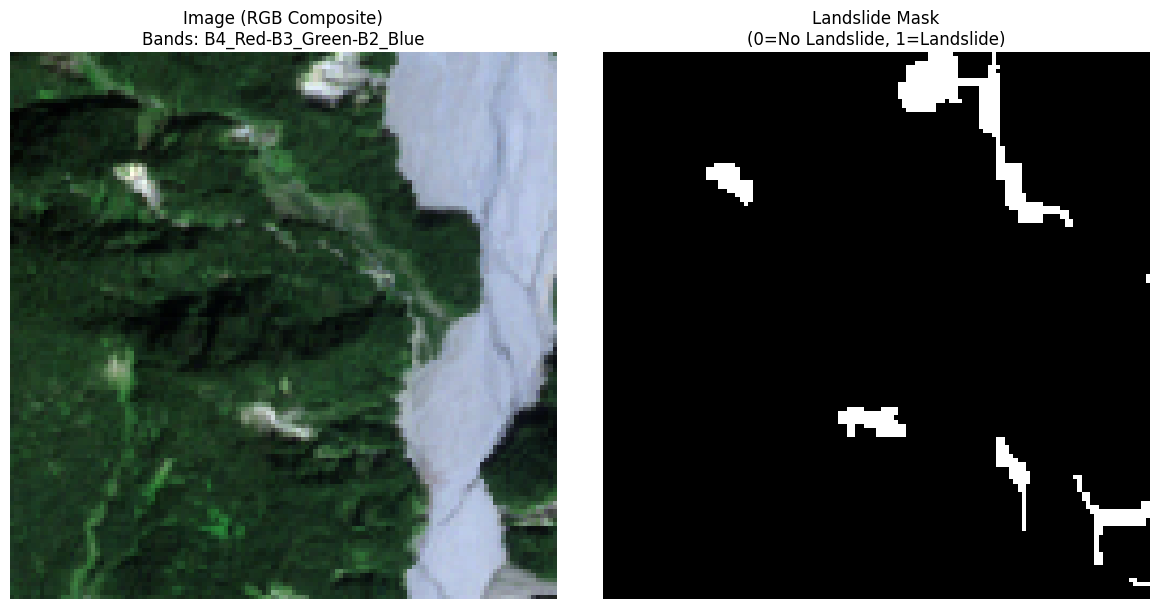

In [10]:
# Load metadata to guide data loading
with open("landslide4sense_geocroissant.json", "r") as f:
    metadata = json.load(f)

# Extract band names from metadata
band_names = metadata['recordSet'][0]['field'][0]['geocr:bandConfiguration']['geocr:bandNamesList']

# Find RGB band indices from metadata
rgb_band_names = ['B4_Red', 'B3_Green', 'B2_Blue']
rgb_indices = [band_names.index(band) for band in rgb_band_names]

# Get paths to a sample image and its corresponding mask
if train_images:
    image_file = train_images[0]
    # Extract the image number from filename (e.g., "image_123.h5" -> "123")
    image_number = image_file.stem.split('_')[1]
    mask_file = dataset_path / "annotations" / "train" / f"mask_{image_number}.h5"
    
    # Read the HDF5 image file (14 bands, 128x128)
    with h5py.File(image_file, 'r') as f:
        image = f['img'][:]  # Shape: (128, 128, 14)
    
    # Read the HDF5 mask file
    with h5py.File(mask_file, 'r') as f:
        mask = f['mask'][:]  # Shape: (128, 128)
    
    # Create RGB composite using band indices from metadata
    image_rgb = image[:, :, rgb_indices]  # Extract RGB bands based on metadata
    
    # Normalize each channel separately for display
    for i in range(3):
        channel = image_rgb[:, :, i]
        min_val = np.min(channel)
        max_val = np.max(channel)
        if max_val > min_val:
            image_rgb[:, :, i] = (channel - min_val) / (max_val - min_val)
    
    # Plot image and mask side-by-side
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].imshow(image_rgb)
    axs[0].set_title(f"Image (RGB Composite)\nBands: {'-'.join(rgb_band_names)}", fontsize=12)
    axs[0].axis("off")
    
    axs[1].imshow(mask, cmap="gray", vmin=0, vmax=1)
    axs[1].set_title("Landslide Mask\n(0=No Landslide, 1=Landslide)", fontsize=12)
    axs[1].axis("off")
    
    plt.tight_layout()
    plt.show()